# Project 3 – Predicting a Categorical Target and Evaluating Performance  
**Dataset:** Titanic  
**Author:** Beth Spornitz  
**Date:** November 1, 2025

### Introduction  
We will use the Titanic dataset to predict passenger survival using 3 methods:
- Decision Tree
- Support Vector Machine
- Neural Network  

We will compare their performance across three feature sets and refelct on each. 


In [19]:
# Import all required libraries once at the top

# Core libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# scikit-learn utilities
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.colors import ListedColormap



# Load dataset
titanic = sns.load_dataset('titanic')
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Reflection 1:
What do you notice about the dataset?  
Which features might help predict survival?


## Section 2. Data Exploration and Preparation

### 2.1 Handle Missing Values and Clean Data
We’ll impute missing values for key features to ensure the models receive complete inputs.  



In [20]:
# - Fill missing ages with median
median_age = titanic['age'].median()
titanic['age'] = titanic['age'].fillna(median_age)

# - Fill missing embark_town with mode
mode_embark = titanic['embark_town'].mode()[0]
titanic['embark_town'] = titanic['embark_town'].fillna(mode_embark)


### 2.2 Feature Engineering
Create new features and convert categorical data to numerical form for modeling.


In [21]:
# - Add family_size = sibsp + parch + 1
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# - Convert sex, embarked, and alone to numeric values
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic['alone'] = titanic['alone'].astype(int)


### Reflection 2  
Why is it important to handle missing values and convert categorical data to numeric form?  


## Section 3. Feature Selection and Justification

### 3.1 Choose features and target
We will set up three cases:
- Case 1: `X = ['alone']` → `y = survived`
- Case 2: `X = ['age']` (drop NA rows) → `y = survived`
- Case 3: `X = ['age','family_size']` (drop NA rows) → `y = survived`

### 3.2 Define X (features) and y (target)
We will assign the input features and target for each case.


In [22]:
# Case 1: Feature = alone
X1 = titanic[['alone']]
y1 = titanic['survived']

# Case 2: Feature = age (drop missing)
X2 = titanic[['age']].dropna()
y2 = titanic.loc[X2.index, 'survived']

# Case 3: Features = age + family_size (drop missing)
X3 = titanic[['age', 'family_size']].dropna()
y3 = titanic.loc[X3.index, 'survived']


### Reflection 3
Why were these features selected?  
Which do you expect to be most predictive of survival?


## Section 4. Train a Classification Model (Decision Tree)

### 4.1 Split the Data (Stratified 80/20)
We will split each feature set into training and testing data using StratifiedShuffleSplit to maintain class balance.

Three cases will be analyzed:

- Case 1: `X = ['alone']` → `y = survived`  
- Case 2: `X = ['age']` → `y = survived`  
- Case 3: `X = ['age', 'family_size']` → `y = survived`


In [23]:
# - Stratified train/test split helper used by all cases
def stratified_split(x, y):
    """Return stratified train/test splits for features x and target y.

    Uses StratifiedShuffleSplit with test_size=0.2 and random_state=123.
    Returns: x_train, x_test, y_train, y_test (in that order).
    """
    splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
    for train_idx, test_idx in splitter.split(x, y):
        x_train = x.iloc[train_idx]
        x_test = x.iloc[test_idx]
        y_train = y.iloc[train_idx]
        y_test = y.iloc[test_idx]
    return x_train, x_test, y_train, y_test


### Apply the helper function to each case

Each case uses the same helper function for consistency.  
This simplifies the workflow and ensures reproducibility.


In [24]:
# - Split data for Case 1: X = ['alone']
X1_train, X1_test, y1_train, y1_test = stratified_split(X1, y1)

# - Split data for Case 2: X = ['age']
X2_train, X2_test, y2_train, y2_test = stratified_split(X2, y2)

# - Split data for Case 3: X = ['age', 'family_size']
X3_train, X3_test, y3_train, y3_test = stratified_split(X3, y3)


### 4.2 Create and Train Decision Tree Models
We will create a Decision Tree model for each feature case.


In [25]:

# Case 1: Train Decision Tree on 'alone'
tree_model1 = DecisionTreeClassifier()
tree_model1.fit(X1_train, y1_train)

# Case 2: Train Decision Tree on 'age'
tree_model2 = DecisionTreeClassifier()
tree_model2.fit(X2_train, y2_train)

# Case 3: Train Decision Tree on 'age' and 'family_size'
tree_model3 = DecisionTreeClassifier()
tree_model3.fit(X3_train, y3_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 4.3 Predict and Evaluate Model Performance
We will print classification reports for each Decision Tree case using both training and test sets.


In [26]:

# Evaluate each case
for label, model, Xtr, Xte, ytr, yte in [
    ('Case 1 - Alone', tree_model1, X1_train, X1_test, y1_train, y1_test),
    ('Case 2 - Age', tree_model2, X2_train, X2_test, y2_train, y2_test),
    ('Case 3 - Age + Family Size', tree_model3, X3_train, X3_test, y3_train, y3_test)
]:
    print(f"\n{label}")
    print("Training Results:")
    print(classification_report(ytr, model.predict(Xtr)))
    print("Testing Results:")
    print(classification_report(yte, model.predict(Xte)))



Case 1 - Alone
Training Results:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       439
           1       0.50      0.51      0.51       273

    accuracy                           0.62       712
   macro avg       0.60      0.60      0.60       712
weighted avg       0.62      0.62      0.62       712

Testing Results:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179


Case 2 - Age
Training Results:
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       439
           1       0.69      0.29      0.41       273

    accuracy                           0.68       712
   macro avg       0.68      0.61      0.60  

### 4.4 Report Confusion Matrix (heatmaps)
We will plot confusion matrices for each Decision Tree case using Seaborn.


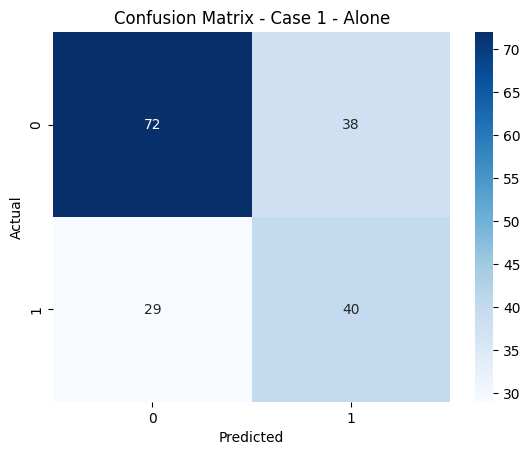

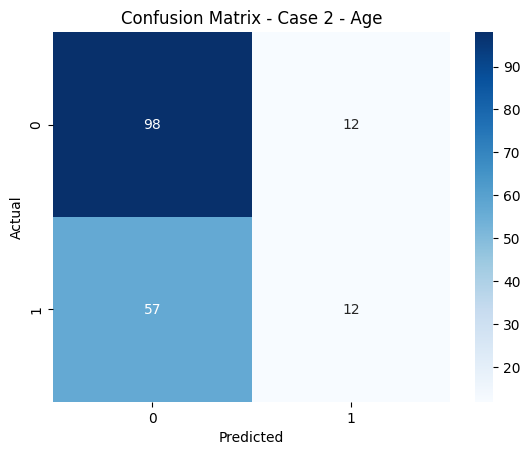

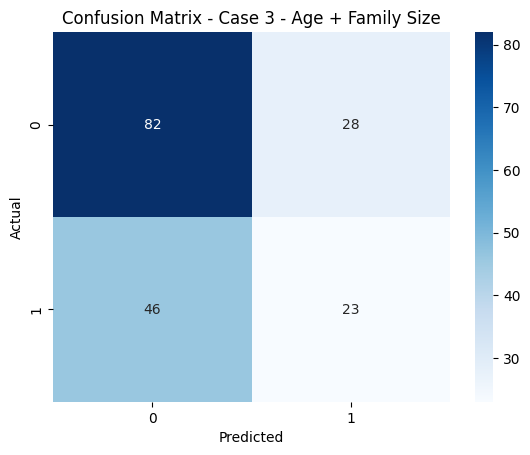

In [27]:

# Generate confusion matrices
for label, model, Xte, yte in [
    ('Case 1 - Alone', tree_model1, X1_test, y1_test),
    ('Case 2 - Age', tree_model2, X2_test, y2_test),
    ('Case 3 - Age + Family Size', tree_model3, X3_test, y3_test)
]:
    cm = confusion_matrix(yte, model.predict(Xte))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {label}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


### 4.5 Plot Decision Trees
We will visualize each Decision Tree model using plot_tree.


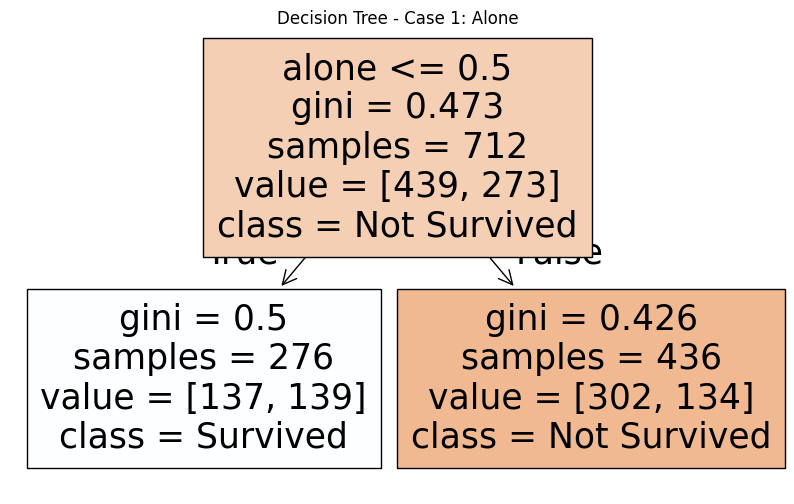

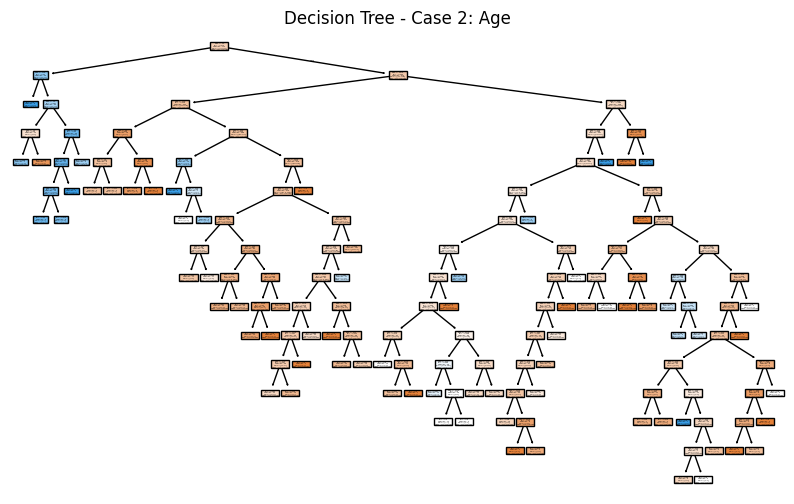

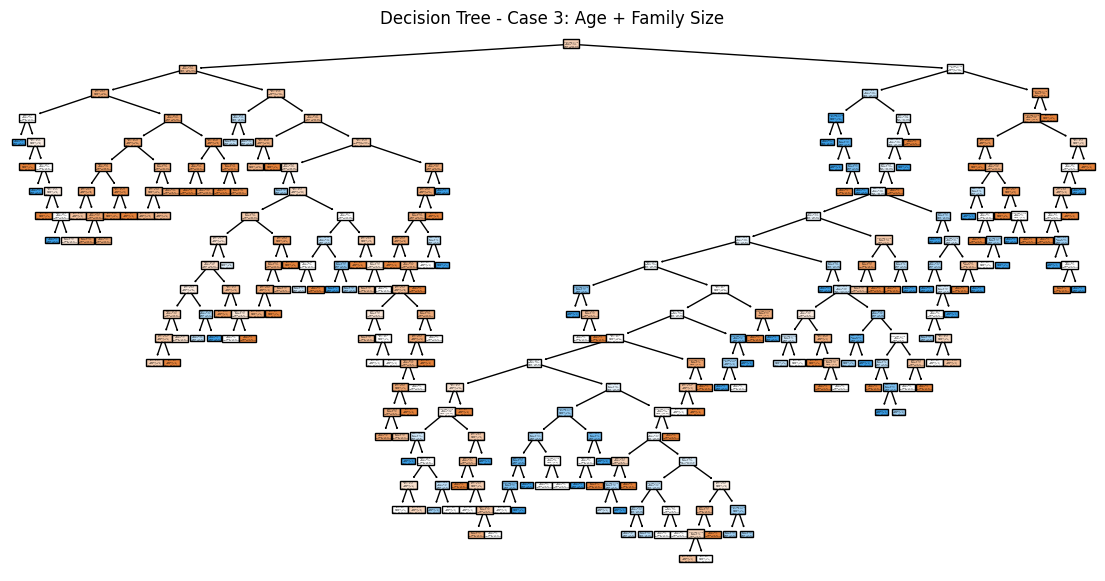

In [28]:
# Case 1
fig = plt.figure(figsize=(10, 6))
plot_tree(tree_model1, feature_names=X1.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title('Decision Tree - Case 1: Alone')
plt.show()

# Case 2
fig = plt.figure(figsize=(10, 6))
plot_tree(tree_model2, feature_names=X2.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title('Decision Tree - Case 2: Age')
plt.show()

# Case 3
fig = plt.figure(figsize=(14, 7))
plot_tree(tree_model3, feature_names=X3.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title('Decision Tree - Case 3: Age + Family Size')
plt.show()


### Reflection 4
Summarize what you learned from the Decision Tree results.  
Were any patterns visible in the feature splits?  
How might tree depth or pruning affect your results?

## Section 5. Compare Alternative Models (SVM and Neural Network)
In a Support Vector Machine (SVM), the kernel function defines how the algorithm transforms data to find a hyperplane that separates the classes.  
If the data is not linearly separable, changing the kernel can help the model find a better decision boundary.

SVC Kernel: Common Types  
- RBF (Radial Basis Function): most commonly used; handles non-linear data well (default)  
- Linear: best for linearly separable data (straight-line separation)  
- Polynomial: useful when the data follows a curved pattern  
- Sigmoid: similar to a neural network activation function; less common  

Commenting the options in and out in the code can be helpful.  
The analyst decides which to use based on their understanding of the results.



In [29]:
# Example Only: How to try different kernels (not run in this project)

# RBF Kernel (default)
# svc_model = SVC(kernel='rbf')
# svc_model.fit(X_train, y_train)

# Linear Kernel
# svc_model = SVC(kernel='linear')
# svc_model.fit(X_train, y_train)

# Polynomial Kernel (e.g., degree=3)
# svc_model = SVC(kernel='poly', degree=3)
# svc_model.fit(X_train, y_train)

# Sigmoid Kernel
# svc_model = SVC(kernel='sigmoid')
# svc_model.fit(X_train, y_train)



### 5.1 Train and Evaluate Support Vector Machine (SVM)
We will train an SVC model for each case using the default Radial Basis Function (RBF) kernel.


In [30]:
# Case 1: train Support Vector Classifier on 'alone'
svc_model1 = SVC()
svc_model1.fit(X1_train, y1_train)

# Case 1: evaluate on test data
print("SVM (RBF) Results - Case 1 (alone)")
print(classification_report(y1_test, svc_model1.predict(X1_test)))

# Case 2: train SVC on 'age'
svc_model2 = SVC()
svc_model2.fit(X2_train, y2_train)

# Case 2: evaluate on test data
print("\nSVM (RBF) Results - Case 2 (age)")
print(classification_report(y2_test, svc_model2.predict(X2_test)))

# Case 3: train SVC on 'age' and 'family_size'
svc_model3 = SVC()
svc_model3.fit(X3_train, y3_train)

# Case 3: evaluate on test data
print("\nSVM (RBF) Results - Case 3 (age + family_size)")
print(classification_report(y3_test, svc_model3.predict(X3_test)))


SVM (RBF) Results - Case 1 (alone)
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179


SVM (RBF) Results - Case 2 (age)
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179


SVM (RBF) Results - Case 3 (age + family_size)
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro av

### 5.2 Visualize Support Vectors
We will visualize support vectors for Case 1 (feature = alone), Case 2 (feature = age), and Case 3 (features = age + family_size).



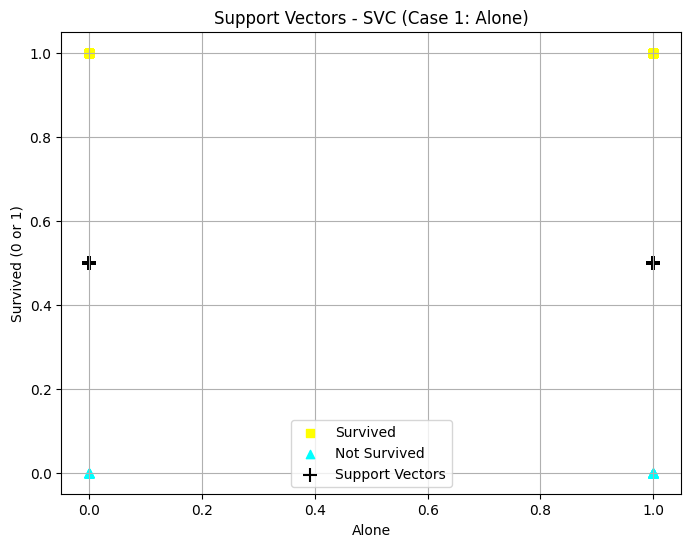

In [31]:
# Case 1: prepare separated values for survived vs not-survived
survived_alone = X1_test.loc[y1_test == 1, 'alone']
not_survived_alone = X1_test.loc[y1_test == 0, 'alone']

# Case 1: plot the 1D points using a y trick (0 for not survived, 1 for survived)
plt.figure(figsize=(8, 6))
plt.scatter(survived_alone, [1] * len(survived_alone), c='yellow', marker='s', label='Survived')
plt.scatter(not_survived_alone, [0] * len(not_survived_alone), c='cyan', marker='^', label='Not Survived')

# Case 1: overlay the support vectors at y=0.5 so they’re visible between classes
if hasattr(svc_model1, 'support_vectors_'):
    support_x = svc_model1.support_vectors_[:, 0]
    plt.scatter(support_x, [0.5] * len(support_x), c='black', marker='+', s=100, label='Support Vectors')

# Case 1: add labels, title, legend, grid
plt.xlabel('Alone')
plt.ylabel('Survived (0 or 1)')
plt.title('Support Vectors - SVC (Case 1: Alone)')
plt.legend()
plt.grid(True)
plt.show()


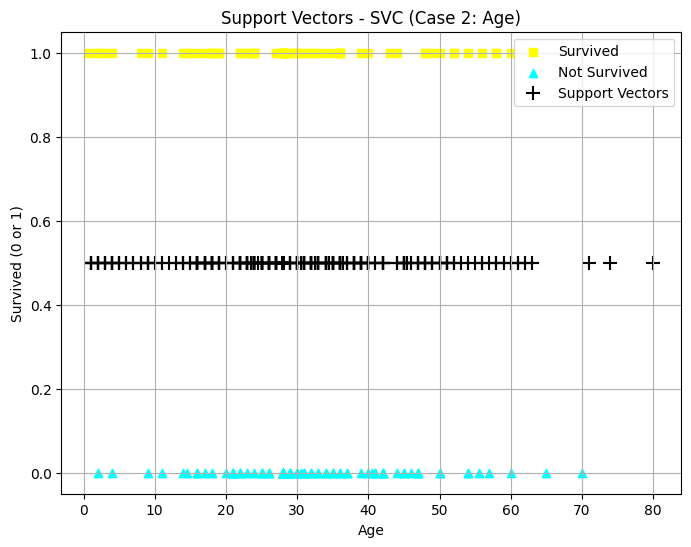

In [32]:
# Case 2: prepare separated values for survived vs not-survived
survived_age = X2_test.loc[y2_test == 1, 'age']
not_survived_age = X2_test.loc[y2_test == 0, 'age']

# Case 2: plot the 1D age values against survival
plt.figure(figsize=(8, 6))
plt.scatter(survived_age, [1] * len(survived_age), c='yellow', marker='s', label='Survived')
plt.scatter(not_survived_age, [0] * len(not_survived_age), c='cyan', marker='^', label='Not Survived')

# Case 2: overlay the support vectors at y=0.5 so they’re visible between classes
if hasattr(svc_model2, 'support_vectors_'):
    support_x = svc_model2.support_vectors_[:, 0]
    plt.scatter(support_x, [0.5] * len(support_x), c='black', marker='+', s=100, label='Support Vectors')

# Case 2: add labels, title, legend, grid
plt.xlabel('Age')
plt.ylabel('Survived (0 or 1)')
plt.title('Support Vectors - SVC (Case 2: Age)')
plt.legend()
plt.grid(True)
plt.show()


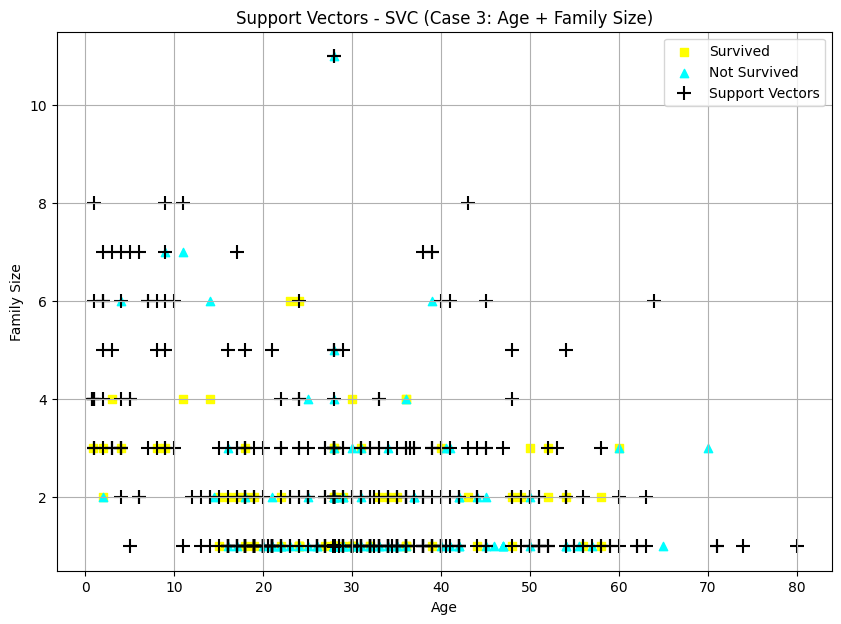

In [33]:
# Case 3: split test data into survived and not-survived subsets
survived_2d = X3_test[y3_test == 1]
not_survived_2d = X3_test[y3_test == 0]

# Case 3: plot 2D scatter of age vs family_size colored by survival
plt.figure(figsize=(10, 7))
plt.scatter(survived_2d['age'], survived_2d['family_size'], c='yellow', marker='s', label='Survived')
plt.scatter(not_survived_2d['age'], not_survived_2d['family_size'], c='cyan', marker='^', label='Not Survived')

# Case 3: overlay support vectors from the trained SVC model
if hasattr(svc_model3, 'support_vectors_'):
    sv = svc_model3.support_vectors_
    plt.scatter(sv[:, 0], sv[:, 1], c='black', marker='+', s=100, label='Support Vectors')

# Case 3: add labels, title, legend, grid
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.title('Support Vectors - SVC (Case 3: Age + Family Size)')
plt.legend()
plt.grid(True)
plt.show()


### 5.3 Train and Evaluate Neural Network (Case 3)
We will train a Multi-Layer Perceptron (MLPClassifier) using age and family_size as inputs and evaluate it on the test set.  
The model will have three hidden layers with decreasing sizes (50, 25, 10) and use the 'lbfgs' solver.


Results for Neural Network on test data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.69      0.83      0.75       110
           1       0.60      0.41      0.48        69

    accuracy                           0.66       179
   macro avg       0.64      0.62      0.62       179
weighted avg       0.65      0.66      0.65       179



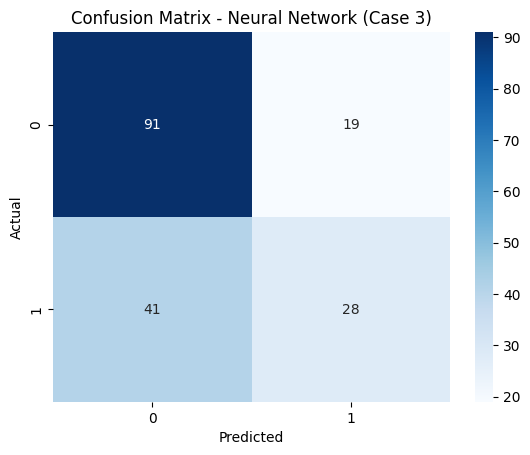

In [34]:
# - Create and train the neural network for Case 3
nn_model3 = MLPClassifier(
    hidden_layer_sizes=(50, 25, 10),
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)
nn_model3.fit(X3_train, y3_train)

# - Predict on the test set for Case 3
y3_nn_pred = nn_model3.predict(X3_test)

# - Print classification results
print("Results for Neural Network on test data (Case 3 - age + family_size):")
print(classification_report(y3_test, y3_nn_pred))

# - Generate confusion matrix and display as heatmap
cm_nn3 = confusion_matrix(y3_test, y3_nn_pred)
sns.heatmap(cm_nn3, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Neural Network (Case 3)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### 5.4 Visualize Neural Network Decision Surface
We will visualize the decision boundary learned by the neural network across the two input features (age and family_size).
This plot helps show how the model separates survivors from non-survivors.


c:\Repos\ml-bethspornitz\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


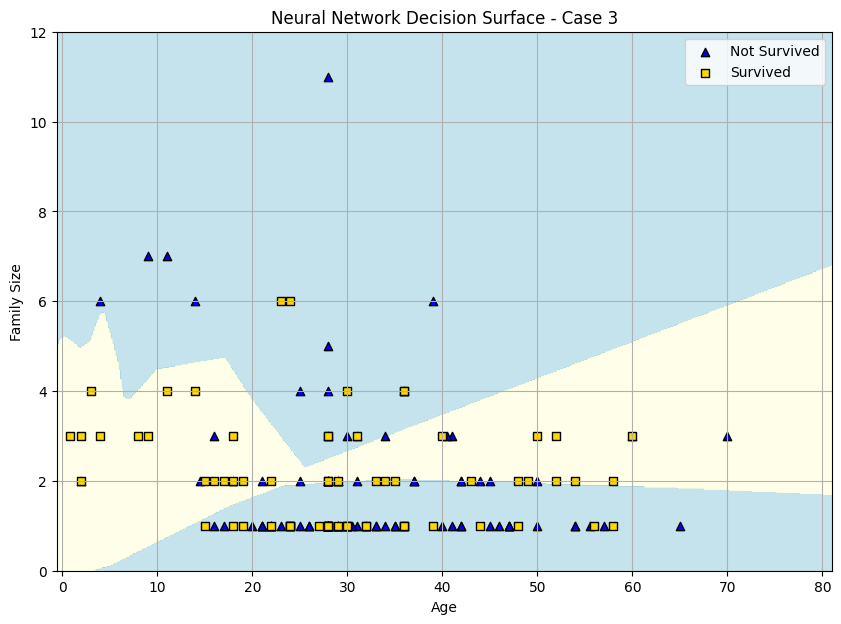

In [35]:
# - Define plotting range with padding for visualization clarity
padding = 1
x_min, x_max = X3['age'].min() - padding, X3['age'].max() + padding
y_min, y_max = X3['family_size'].min() - padding, X3['family_size'].max() + padding

# - Create a dense grid of age and family_size values
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)

# - Predict survival outcomes for each point on the grid
Z = nn_model3.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# - Plot decision surface background colors
plt.figure(figsize=(10, 7))
cmap_background = ListedColormap(['lightblue', 'lightyellow'])
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.7)

# - Overlay actual test points
plt.scatter(
    X3_test['age'][y3_test == 0],
    X3_test['family_size'][y3_test == 0],
    c='blue', marker='^', edgecolor='k', label='Not Survived'
)
plt.scatter(
    X3_test['age'][y3_test == 1],
    X3_test['family_size'][y3_test == 1],
    c='gold', marker='s', edgecolor='k', label='Survived'
)

# - Final chart formatting
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.title('Neural Network Decision Surface - Case 3')
plt.legend()
plt.grid(True)
plt.show()


### Reflection 5
How well did each of these new models perform (SVM and Neural Network)?  
Were there any surprising results or insights?  
Why might one model outperform the others on this dataset?


## Section 6. Final Thoughts and Insights
Summarize your findings and challenges faced.  
Include a Markdown summary table to show model performance side by side.


# include markdown summary table here

### Reflection 6
What are your final conclusions from this project?  
How could you improve model performance or feature selection in the future?  
What are your next steps to gain more insight or to explore other classification models?
